In [6]:
from numpy import *
import pandas as pd
import sympy as sm
import matplotlib.pyplot as plt

# Задание 2


### Численное дифференцирование

In [7]:
def diff_by_Jay(f, left, right, num_of_dots, dx):
    
    
    """ Функция выводит графики производных через формулу и стандартные методы
    
    f - Функция
    left - левая граница
    right - правая граница
    num_of_dots - количество точек в интервале 
    dx - ша с которым мы ищем производную"""
    
    # ==========Задали функции==============
    
    x, y = sm.symbols('x y')
    
    func = sm.parse_expr(f)
    
    func_d = sm.diff(func)
    
    
    # =====Формула рассчета производной=====
    
    func_d_hands = lambda x1, dx: (func.evalf(subs={x:x1 + dx}) - func.evalf(subs={x:x1 - dx}))/(2*dx)
    
    # =======Определение интервала==========
    left_b = eval(str(left))
    right_b = eval(str(right))
    num = int(eval(str(num_of_dots))//1)
                                              
    x1 = list(linspace(left_b, right_b, num = num))
    
                                              
    # ==========Подсчет значений============
                                              
    y_f = []
    y_df1 = []
    y_df2 = []
    helpi = [] 
    for i in x1:
        try:
            a = func.evalf(subs={x:i})
            b = func_d.evalf(subs={x:i})
            c = func_d_hands(i, dx)
            y_f.append(a)
            y_df1.append(b)
            y_df2.append(c)
        except:
            helpi.append(i)
    
    for h in helpi:
        x1.remove(h)
    
    # ========Создание ДатаФрейма============
    
    df = pd.DataFrame({'x': x1, "f(x)": y_f, "f'(x)s": y_df1, "f'(x)h": y_df2})
    
    # ==========Построение графика============
    fig, axes = plt.subplots(1, 3)

    
    axes[0].plot(df['x'],df['f(x)'])
    axes[1].plot(df['x'],df["f'(x)s"])
    axes[2].scatter(df['x'],df["f'(x)h"],marker ='.',linewidths=0.5)


    axes[0].set_title("f(x)",
                    loc = 'center',
                    pad = 10,
                    fontsize = 20)    

    axes[1].set_title("f'(x)s",
                    loc = 'center',     
                    pad = 10,
                    fontsize = 20)

    axes[2].set_title("f'(x)h",
                    loc = 'center',
                    pad = 10,
                    fontsize = 20)


    for ax in axes:
        ax.grid(axis = 'both')

    fig.suptitle('Графики',
                    fontsize = 20,
                    y = 1.1)

    fig.set_figheight(4)
    fig.set_figwidth(16)

    plt.show()
    
    print(df)

# Приемер использования

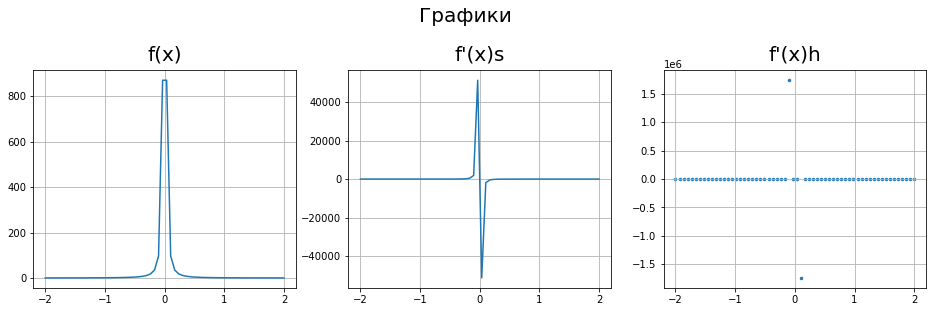

           x               f(x)              f'(x)s              f'(x)h
0  -2.000000  0.250000000000000   0.250000000000000   0.251254703173975
1  -1.932203  0.267851646660511   0.277249950052108   0.278741175896469
2  -1.864407  0.287685950413223   0.308608564988730   0.310391903883205
3  -1.796610  0.309807760768957   0.344880337459782   0.347027241314017
4  -1.728814  0.334582852748943   0.387066437493875   0.389669610710333
5  -1.661017  0.362453144523115   0.436423174017629   0.439604116727092
6  -1.593220  0.393956541421458   0.494541190295021   0.498460892680698
7  -1.525424  0.429753086419753   0.563454046639232   0.568328367714964
8  -1.457627  0.470659816116820   0.645789050020753   0.651911176732485
9  -1.389831  0.517697798929209   0.744979759434715   0.752753562054631
10 -1.322034  0.572156476002630   0.865570053439876   0.875560543526586
11 -1.254237  0.635682980277575    1.01365664422640    1.02666786305077
12 -1.186441  0.710408163265306    1.19754518950437    1.2147431

In [8]:
diff_by_Jay('1/x**2', -2, 2, 60, 0.1)

### Численное интегрирование

In [11]:
def integr_by_Jay(f, left, right, step):
    """Функция считает площадь под графиком на интервале
    f - Функция 
    left - левая граница
    right - правая граница
    step - шаг для метода трапеций"""
    # ==========Задали функции==============
    
    x, y = sm.symbols('x y')
    
    func = sm.parse_expr(f)
    
    func_d = sm.diff(func)
    
    left_b = eval(str(left))
    right_b = eval(str(right))
    
    
    
    # constconstconstconstconstconstconstconst
    
    min_step = step
    
    left_tr = left
    der_l = func_d.evalf(subs={x:left_tr})
    
    right_tr = left_tr + min_step
    
    
    square = 0
    list_of_tr = []
    
    # constconstconstconstconstconstconstconst
    
    
    
    while not(right_tr >= right_b):
        
#         der_r = func_d.evalf(subs={x:right_tr})
        
        if True:
            
            list_of_tr.append([left_tr,func.evalf(subs={x:left_tr}),right_tr,func.evalf(subs={x:right_tr})])
            
            left_tr = right_tr
            right_tr = left_tr + min_step
#             der_l =func_d.evalf(subs={x:left_tr})
            
        else:
            right_tr += min_step
            if right_tr >= right_b:
                list_of_tr.append([left_tr,func.evalf(subs={x:left_tr}),right_tr,func.evalf(subs={x:right_tr})])
         
    
#     =========== Построение графиков =============
    x_spl = list(linspace(left_b, right_b, int((abs(left_b-right_b)*100)//1)))
    y = []
    helpi = [] 
    for i in x_spl:
        try:
            a = func.evalf(subs={x:i})
            y.append(a)
        except:
            helpi.append(i)
    
    for h in helpi:
        x_spl.remove(h)
    
    
    fig, ax = plt.subplots()
    
    ax.plot(x_spl, y)
    
    for s in list_of_tr:
        ax.plot([s[0],s[0],s[2],s[2]],[0,s[1], s[3],0])
        square += (abs((s[0]-s[2]))*(s[1]+s[3]))/2
    
    print('S = ', square) 

# Пример Работы

S =  186.180000000000


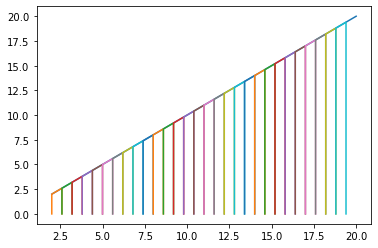

In [14]:
integr_by_Jay('x', 2, 20, 0.6)

### Функция построения интеграла

In [18]:
def S(f, left, right):
    
    """Вспомогательная функция, которая ищет площадь под графиком
    
    f - Функция
    left - Левая граница
    right - Правая граница"""
    
    # ==========Задали функции==============
    
    x, y = sm.symbols('x y')
    
    func = sm.parse_expr(f)
    
    func_d = sm.diff(func)
    
    left_b = eval(str(left))
    right_b = eval(str(right))
    
    
    
    # constconstconstconstconstconstconstconst
    
    min_step = 0.001
    
    left_tr = left
    der_l = func_d.evalf(subs={x:left_tr})
    
    right_tr = left_tr + min_step
    
    
    square = 0
    list_of_tr = []
    
    # constconstconstconstconstconstconstconst
    
    
    
    while not(right_tr >= right_b):
        
        der_r = func_d.evalf(subs={x:right_tr})
        
        if abs(der_l - der_r) >= 0.001:
            
            list_of_tr.append([left_tr,func.evalf(subs={x:left_tr}),right_tr,func.evalf(subs={x:right_tr})])
            
            left_tr = right_tr
            right_tr = left_tr + min_step
            der_l =func_d.evalf(subs={x:left_tr})
            
        else:
            right_tr += min_step
            if right_tr >= right_b:
                list_of_tr.append([left_tr,func.evalf(subs={x:left_tr}),right_tr,func.evalf(subs={x:right_tr})])
         
    for s in list_of_tr:

        square += (abs((s[0]-s[2]))*(s[1]+s[3]))/2
    
    return eval(str(square))

In [19]:
def antiderivative_by_Jay(f, left, right):
    """Построение графика интеграла
    
    f - Функция
    left - Левая граница
    right - Правая граница"""
        
    x, y = sm.symbols('x y')
    
    func = sm.parse_expr(f)
    step = 0.1
    left_b = eval(str(left))
    left_h = left_b + step 
    right_b = eval(str(right))

    x1 = []
    y1 = []
    
    y1.append(S(f, left_b, left_h))

    x1.append(left_h)
    
    while not(left_h >= right_b):
        left_h += step

        y1.append(y1[-1] + S(f,x1[-1], left_h))
        x1.append(left_h)
    
    plt.scatter(x1,y1,marker ='.',linewidths=0.5)
    

# Пример Работы

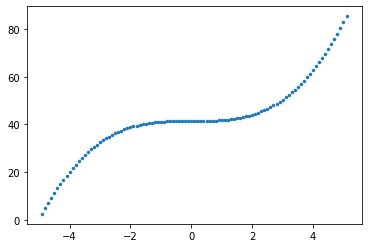

In [20]:
antiderivative_by_Jay('x**2',-5, 5)

# Задание 3

Все функции вместе с их документацией лежит в этом репе: https://github.com/Ko-nD/culc_matrix

# Задание 4

#### Вспомогательные функции

In [27]:
def reading_csv(path, header = False, delimiter = ','):
    """Считывание X, Y из файла
    
    path - путь к файлу
    header - заголовки
    delimiter - разделитель"""
    
    from pandas import read_csv
    
    if header:
        points = read_csv(path, names = header, sep = delimiter)
        return [i for i in points[list(points)[0]]], [i for i in points[list(points)[1]]]
    else:
        points = read_csv(path, sep = delimiter)

        return [i for i in points[list(points)[0]]], [i for i in points[list(points)[1]]]
    
    
def factor(n):
    """Факториал N
    return N!"""
    r = 1
    for i in range(1,n+1):
        r = r*i   
    return r

def check_step(x):
    """Проверка Шага выборки"""
    s = x[1] - x[0]
    return s

# Интерполяция Лаграндж

In [23]:
def mnogochlen(x, y):
    """Функция принимающая x, y и выдающая ответ
    
    x - x
    y - y"""
    
    from scipy.linalg import solve
    from numpy import array, reshape
    main_mtrx = []
    for i in x:
        main_mtrx.append([i**(el) for el in range(len(x))])
    main_mtrx = array(main_mtrx)
    y = [[i] for i in y]
    y = array(y)
    answ = solve(main_mtrx, y)
    
    return answ    

def answer(x, y, answ, flag):
    """Выдает ответ, и Многочлен
    x, y = x, y
    answ - ответ 
    flag - влияет на выдачу ответа
    Либо просто x, y 
    либо график"""
    import matplotlib.pyplot as plt
    h = ''
    answ = [float(el[0]) for el in answ]
    
    for ind, el in enumerate(answ[::-1]):
        h += f'+{el}*(x**{len(answ) - ind-1})'
    x1 = []
    y1 = []
    for i in range(int(min(x))*10, int(max(x))*10 + 1):
        x1.append(i/10)
        y1.append(eval(h.replace('x', str(i/10))))
    if flag:
        print('Многочлен: ' + h)
        for ind, el in enumerate(x):
            print('x: '+ str(el)+' '+'y: '+ str(y[ind])+ ' ' + 'fi: ' + str(round(eval(h.replace('x', str(el))))))

        plt.scatter(x, y)
        plt.plot(x1,y1)
    else:
        return [x1, y1] 
    
def lagr(path, header = False, delimiter = ',', flag = True):
    
    """Объединение метода Answer, для красоты
    
    x, y = x, y
    answ - ответ 
    flag - влияет на выдачу ответа
    Либо просто x, y 
    либо график
    """
    
    x, y = reading_csv(path = path, delimiter = delimiter)
    return answer(x, y, mnogochlen(x, y), flag = flag)

# Пример работы

In [ ]:
lagr('XY.csv')

# Метод Ньютона

In [25]:
def table(x, y):
    """строит таблицу ньютона для вычисления кэфов методом Ньютона
    
    x, y = x, y
    """
    import numpy as np
    table1 = [[0 for j in range(len(x))] for i in range(len(x)+1)]
    table1[0], table1[1] = x, y 
    for ind, el in enumerate(table1[2:]):
        for i in range(len(el)-ind-1):
            table1[ind+2][i] = -(table1[ind+1][i] - table1[ind+1][i+1])
    table1 = np.array(table1).T
    return table1



def newton_F(x, y, table):
    """Функция Ньютон вперед
    
    X, Y = X, Y
    table - Таблица Ньютона (метод table)
    
    return - многочлен Ньютона
    """
    from sympy import simplify, expand, Symbol
    P = ''
    h = check_step(x)
    
    for i in range(1, len(y) + 1):
        skobochki = ''
        for j in range(1, i):
            skobochki += f'*(x - {table[j-1][0]})'
            
        helpi = f'{table[0][i]}/({factor(i-1)}*{h**(i-1)})'
        if i == 1:
            P += f'({helpi}){skobochki}'
        else:
            P += f'+({helpi}){skobochki}'
            

    return P

def newton_S(x, y, table):
    """Функция Ньютон назад
    
    X, Y = X, Y
    table - Таблица Ньютона (метод table)
    
    return - многочлен Ньютона"""

    from sympy import simplify, expand, Symbol
    P = ''
    h = check_step(x)
    
    for i in range(1, len(y)+1):
        skobochki = ''
        for j in range(1, i):
            skobochki += f'*(x - {table[len(y)-j][0]})'
        
        helpi = f'{table[len(y) - i][i]}/({factor(i-1)}*{h**(i-1)})'
        if i == 1:
            P += f'({helpi}){skobochki}'
        else:
            P += f'+({helpi}){skobochki}'

    return P
            
            
def newton(path, header = False, delimiter = ',', FoS = 'F', flag = True):
    """
    Функция объединяющая эти два метода (Newton_F, Newton_S)
    в один посредствам флага 

    path - Путь к X, Y
    
    """
    import matplotlib.pyplot as plt
    x, y = csv(path = path, delimiter = delimiter)
    if FoS == 'F':
        F = newton_F(x, y, table(x, y))
    if FoS == 'S':
        F = newton_S(x, y, table(x, y))
    

    x1 = []
    y1 = []
    for i in range(int(min(x))*10, int(max(x))*10+1):
        x1.append(i/10)
        y1.append(eval(F.replace("x", str(i/10))))

    if flag:
        for ind, el in enumerate(x):
            print('x: '+ str(el)+' '+'y: '+ str(y[ind])+ ' ' + 'fi: ' + str(eval(F.replace("x", str(i/10)))))
        print(F)
        
        plt.plot(x1,y1)
        plt.scatter(x, y)
    else:
        return [x1, y1]

# Пример Работы

In [ ]:
newton('XY_2.csv', FoS = 'F')
newton('XY_2.csv', FoS = 'S')

# Метод Кубического сплайна

In [31]:
def search_C(x, y):
    from scipy.linalg import solve
    from numpy import vstack, array
    """ Поиск С по формуле и
    генерируемой таблице
   
    x, y = x, y"""
    from scipy.linalg import solve
    from numpy import vstack, array
    
    h = check_step(x)
    X = [[4*h if i == j else 0 for j in range(len(x)-2)]for i in range(len(x) - 2)]
    
    for i in range(len(X)):
        try:
            X[i][i+1] = h
        except:
            pass
        try:
            X[i+1][i] = h
        except:
            pass
    
    Y = [[(3/h)*(y[i+2]-2*y[i+1]+y[i])] for i in range(len(x)-2)]
    
    return vstack(([0],array(solve(X,Y))))


def search_ABD(x, y, c):
    
    """Поиск Остальных кэфов через С
    x, y = x, y 
    c = search_C(x, y)
    """
    h = check_step(x)
    
    c = [float(el[0]) for el in c]
    c += [0]
    a = y[:-1]
    d = [(c[i+1]-c[i])/3*h for i in range(len(c)-1)] 
    
    b = [(y[i]-y[i-1])/h-(c[i+1]+2*c[i])*h/3 for i in range(len(c)-1)]
    del c[-1]
    
    return [a,b,c,d]

def splain(path):
    """Генерация формул и вычисление значений в точках
    path - путь к x, y
    """
    x, y = csv(path)
    
    abcd = search_ABD(x, y, search_C(x, y))[::-1]
    for i in range(len(abcd[0])):
        helpi = f'{abcd[0][i]}*(x-{x[i]})**3+{abcd[1][i]}*(x-{x[i]})**3+{abcd[2][i]}*(x-{x[i]})**3+{abcd[3][i]}'
        print('x: '+str(x[i+1])+' '+'y: '+str(y[i])+' fi: '+str(eval(helpi.replace('x', str(x[i]))))+"  "+helpi)
        


# Пример Работы

In [ ]:
splain("XY_2.csv")

# Апроксимация

In [33]:
def kx(path,delim = ',', flag = True):
    """Апроксимация Прямой
    
    path - Путь к x, y
    flag - Влияет на вывод ответа
    Либо Просто точки,
    Либо Графики"""
    x, y = csv(path, delimiter=delim)
    from scipy.linalg import solve
    import matplotlib.pyplot as plt
#     Решаем слау для поиска кэфов
    kx = solve([[sum([i**2 for i in x]),sum(x)],[sum(x), len(x)]],[[sum([y[i]*x[i] for i in range(len(x))])],[sum(y)]])
    x1 = []
    y1 = []
#     генерируем точки
    for i in range(int(min(x)), int(max(x))+1):
        x1.append(i)
        y1.append(kx[0][0]*i+kx[1][0])
#         выводим
    if flag: 
        print(f'y = {kx[0][0]}x+{kx[1][0]}')
        print()
        for ind, el in enumerate(x):
            print(f'x:{el} y:{y[ind]} fi:{round(kx[0][0]*el+kx[1][0])}')
        print()
        print(f'Дисперсия {sum([(y[ind] - kx[0][0]*el+kx[1][0])**2 for ind, el in enumerate(x)])}')
        plt.plot(x1, y1)
        plt.scatter(x, y)
    else:
        return [x1, y1]

In [34]:
def ax2(path, flag = True):
    """Апроксимация Квадратичной функцией
    
    path - Путь к x, y
    flag - Влияет на вывод ответа
    Либо Просто точки,
    Либо Графики
    """
    x, y = csv(path)
    from scipy.linalg import solve
    import matplotlib.pyplot as plt
    kx = solve([[sum([i**4 for i in x]),sum([i**3 for i in x]),sum([i**2 for i in x])],
                [sum([i**3 for i in x]),sum([i**2 for i in x]),sum([i**1 for i in x])],
                [sum([i**2 for i in x]),sum([i**1 for i in x]),len(x)]],
                [[sum([(x[i]**2)*y[i] for i in range(len(x))])],
                 [sum([x[i]*y[i] for i in range(len(x))])],
                 [sum([y[i] for i in range(len(x))])]])
    
    x1 = []
    y1 = []
    for i in range(int(min(x))*10, (int(max(x))+1)*10):
        x1.append(i/10)
        y1.append(kx[0][0]*(i/10)**2+kx[1][0]*i/10+kx[2][0])
    if flag:
        print(f'y = {kx[0][0]}x**2+{kx[1][0]}x + {kx[2][0]}')
        print()
        for ind, el in enumerate(x):
            print(f'x:{el} y:{y[ind]} fi:{kx[0][0]*(el)**2+kx[1][0]*el+kx[2][0]}')
        print()
        print(f'Дисперсия {sum([(y[ind] - kx[0][0]*(x[ind])**2+kx[1][0]*x[ind]+kx[2][0])**2 for ind, el in enumerate(x)])}')
        plt.plot(x1, y1)
        plt.scatter(x, y)
    else:
        return [x1, y1]

In [36]:
def norm_v2(path, flag = True):
    """Апроксимация Нормальным распределением
    
    path - Путь к x, y
    flag - Влияет на вывод ответа
    Либо Просто точки,
    Либо Графики"""
    from math import log, exp
    from numpy import array, dot, linalg, arange
    import matplotlib.pyplot as plt
    
    x, y = reading_csv(path)
    X = []
    Y = []
    for ind, el in enumerate(x):
        X.append([1, el, el**2])
        Y.append([log(y[ind])])
    B = dot(dot(linalg.inv(dot(array(X).T,array(X))), array(X).T), array(Y))
    
    a = exp(B[0][0] - (B[1][0]**2)/(4*B[2][0]))
    b = - (1/(B[2][0]))
    c = - (B[1][0]/(B[2][0]*2))
    
    f = lambda x: a * exp(-((x - c)**2/b))
    
    x1 = []
    y1 = []
    for el in arange(min(x), max(x), 0.1):
        x1.append(el)
        y1.append(f(el))
    plt.plot(x1, y1, color = 'orange')
    plt.scatter(x, y)

# Апроксимация и интерполяции стандартными функцимя 

In [37]:
def numpy_poli(path, flag):
    """Выдает точки через Нумпай Полифит
    Path - Путь к файлу
    return точки для построения """
    x, y = csv(path = path)
    from numpy import polyfit
    import matplotlib.pyplot as plt
    x1 = []
    y1 = []
    formula = ''
    m = polyfit(x, y, 2)
    for ind, el in enumerate(m):
        formula += f'+{el}*x**{len(m)-ind-1}'
    for x_el in range((int(min(x)))*10, (int(max(x))+1)*10):
        x1.append(x_el/10)
        y1.append(eval(formula.replace("x", str(eval(f'{x_el}/10')))))
    return [x1, y1]
    
def scipy_interpol(path, flag):
    """Выдает точки через Нумпай Полифит
    Path - Путь к файлу
    return точки для построения """
    x, y = csv(path = path)
    from scipy import interpolate
    from numpy import arange
    import matplotlib.pyplot as plt
    f = interpolate.interp1d(x, y, kind = 'cubic')
    xnew = arange(min(x), max(x), 0.1)
    
    ynew = f(xnew)
    return [xnew, ynew]

# Объединение всех функций интерполяции и Апроксимации

In [38]:
def comparison(path):
    """Объединение всех функций интерполяции и Апроксимации
    path - путь к точкам"""
    x, y = csv(path = path)
    import matplotlib.pyplot as plt
    fig, axes = plt.subplots(2, 4)
    
    function_list = [[lagrange, scipy_interpol], [kx, ax2, numpy_poli]]
    for ind, i_a in enumerate(function_list):
        for i, func in enumerate(i_a):
#             print(func)
            m = func(path = path, flag = False)
            axes[ind][i].set_title(func.__name__)
            axes[ind][i].plot(m[0], m[1])
            axes[ind][i].scatter(x, y, color = 'orange')
#             print(func.__name__)
    m = newton(path, FoS = 'F', flag =False)
    axes[0][2].set_title('Newton F')
    axes[0][2].plot(m[0], m[1])
    axes[0][2].scatter(x, y, color = 'orange')
#     print('newton >')
    m = newton(path, FoS = 'S', flag =False)
    axes[0][3].set_title('Newton S')
    axes[0][3].plot(m[0], m[1])
    axes[0][3].scatter(x, y, color = 'orange')
#     print('newton <')
    m = al_aprr(path, 'c1 * E**(-((x-c2)**2)/(c3**2))', [c1, c2, c3], flag = False)
    axes[1][3].set_title('Нормальное')
    axes[1][3].plot(m[0], m[1])
    axes[1][3].scatter(x, y, color = 'orange')
    
    fig.set_figheight(10)
    fig.set_figwidth(16)

# Вот Здесь документация на вейвлеты

# Задание 6 Оду

# Эйлер Коши


Мини туториал, для того чтобы ввести систему уравнений:

1) Создаем список А, в который по очередно вписываем все формулы системы

2) Создаем список B, в который поочердно записываем начальные условия. Тк для всех условй x - одинаковый и равен началу интервала, то просто запишите y, который соответствует уровнению по порядку

3) Создаем список C, в формате [Начало, Конец, Шаг]

4) Вызываем функцию допустим Eiler_Koshi(A, B, C) и радуемся таблице значений

5) Если нужна визуализация, просто к таблице применяем функцию analysis Пример analysis(Eiler_Koshi(["y' = x*2 + z","z' = y - z"],[1, 0],[0, 1, 0.1]))

In [ ]:
def Eiler_Koshi(functions, start, limits):
    
    '''
    Входные данные:
    Функции - [func1, func2 ...],
    Нач усл - [y1, y2 ...],
    Границы - [left, right, step]   
    '''
    
    from numpy import arange, e, sin, cos
    import matplotlib.pyplot as plt
    from pandas import DataFrame
    
    dict_of_func = {}
    for func in functions:
        dict_of_func[func[:(func.find("'"))]] = func[(func.find('=')+1):].replace(' ','')

    x_plot = arange(limits[0],limits[1],limits[2])
    

    k = 0
    formats_i = ''
    formats_i1 = ''
    for key, val in dict_of_func.items():
        exec(f'{key}_i =  {start[k]}')
        exec(f'{key}_i1 = {start[k]}')
        exec(f'{key}_plot = []')
        formats_i += f'.replace("{key}", str({key}_i)).replace("x",str(x))'
        formats_i1 += f'.replace("{key}", str({key}_i1)).replace("x",str(x+limits[2]))'
        k += 1

        
    for x in x_plot:
        
        for key, val in dict_of_func.items():
            exec(f'{key}_i = {key}_i1')
            
        for key, val in dict_of_func.items():
            exec(f'{key}_i1 = float(eval(str({key}_i)+"+"+str({limits[2]})+"*"+str(eval("{val}"{formats_i}))))')
                
        for key, val in dict_of_func.items():
            exec(f'{key}_i1 = float(eval(str({key}_i))){"+"}{limits[2]}/2{"*("}float(eval("{val}"{formats_i})){"+"}float(eval("{val}"{formats_i1})){")"}')
            
        for key, val in dict_of_func.items():
            exec(f'{key}_plot.append({key}_i1)')
    
    dict_for_df = {'x': x_plot}
    for key, val in dict_of_func.items():  
        exec(f'dict_for_df["{key}"] = {key}_plot')
        
    return DataFrame(dict_for_df)

# Рунге кутта

In [41]:
def Runge_Kutta(functions, start, limits):
    
    '''
    Входные данные:
    Функции - [func1, func2 ...],
    Нач усл - [y1, y2 ...],
    Границы - [left, right, step]   
    '''
    
    from numpy import arange, e, sin, cos
    import matplotlib.pyplot as plt
    from pandas import DataFrame
    
    dict_of_func = {}
    for func in functions:
        dict_of_func[func[:(func.find("'"))]] = func[(func.find('=')+1):].replace(' ','')

    x_plot = arange(limits[0],limits[1] + limits[2],limits[2])
    

    k = 0
    formats_i_1 = ''
    formats_i_2 = ''
    formats_i_3 = ''
    formats_i_4 = ''
    
    for key, val in dict_of_func.items():
        exec(f'{key}_i =  {start[k]}')
        exec(f'{key}_plot = []')
        formats_i_1 += f'.replace("{key}", str({key}_i)).replace("x",str(x))'
        formats_i_2 += f'.replace("{key}", str({key}_i + {key}_1/2)).replace("x",str(x + limits[2]/2))'
        formats_i_3 += f'.replace("{key}", str({key}_i + {key}_2/2)).replace("x",str(x + limits[2]/2))'
        formats_i_4 += f'.replace("{key}", str({key}_i + {key}_3/2)).replace("x",str(x + limits[2]/2))'
        k += 1

        
    for x in x_plot:
         
        for key, val in dict_of_func.items():
            exec(f'{key}_plot.append({key}_i)')
            
        for key, val in dict_of_func.items():
            exec(f'{key}_1 = {limits[2]} * float(eval("{val}"{formats_i_1}))')
            
        for key, val in dict_of_func.items():
            exec(f'{key}_2 = {limits[2]} * float(eval("{val}"{formats_i_2}))')
                
        for key, val in dict_of_func.items():
            exec(f'{key}_3 = {limits[2]} * float(eval("{val}"{formats_i_3}))')
            
        for key, val in dict_of_func.items():
            exec(f'{key}_4 = {limits[2]} * float(eval("{val}"{formats_i_4}))')
    
        for key, val in dict_of_func.items():
            exec(f'{key}_i = {key}_i + (1/6)*({key}_1+2*{key}_2+2*{key}_3+{key}_4)')
            
        
                 
    dict_for_df = {'x': x_plot}
    for key, val in dict_of_func.items():  
        exec(f'dict_for_df["{key}"] = {key}_plot')
        
    return DataFrame(dict_for_df)

# Анализ

In [42]:
def analysis(df):
    """Просто отправьте в эту функци ответ от (Runge Kutta например...)"""
    import matplotlib.pyplot as plt
    
    cols = df.columns.tolist()
    
    for element in cols[1:]:
        plt.scatter(df[cols[0]], df[element], label = f'{element}({cols[0]})')
        plt.legend()
        plt.show()
        newton(list(df[cols[0]]),list(df[element]))
        ax2(list(df[cols[0]]),list(df[element]))